In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
#y_data = b + w*x_data

In [3]:
x = np.arange(-200,-100,1) #b
y = np.arange(-5,5,0.1) #w
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

In [4]:
b = -120 #initial b
w = -4 #inital w
eta = 1 #learning rate
iteration = 100000

#store initial b w for plotting
b_history = [b]
w_history = [w]

eta_b = 0
eta_w = 0
#Iteration
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n]- b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n]- b - w*x_data[n])*x_data[n]
    
    eta_b = eta_b + b_grad ** 2
    eta_w = eta_w + w_grad ** 2
    #update parameters
    b = b - eta/np.sqrt(eta_b) * b_grad
    w = w - eta/np.sqrt(eta_w) * w_grad

    #store parameters for plotting
    b_history.append(b)
    w_history.append(w)

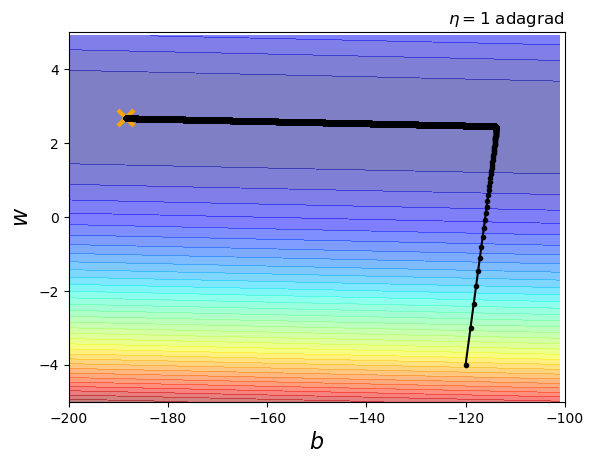

In [5]:
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.title(r'$\eta=1$ adagrad', loc='right')
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()